In [7]:
import os
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

In [8]:
def run_pca(data: List[List[float]], num_components: int, file_name: str, reduced: bool) -> Tuple[List[float], List[float], str]:
    movement: str = file_name.split('.')[0].replace('_', ' ').upper()
    
    # perform PCA (Principal Component Analysis)
    pca = PCA(n_components=num_components)
    pca.fit(data)

    # get variance ratio & cumulative variance
    variance_ratio: List[float] = pca.explained_variance_ratio_
    cumulative_variance: List[float] = np.cumsum(variance_ratio)

    # print info
    if not reduced:
        print(f"original data:\n {data}\n")
    print(f"variance ratio:\n {variance_ratio}\n")
    print(f"cumulative variance:\n {cumulative_variance}")

    return variance_ratio, cumulative_variance, movement


def reduce_dimensions(cumulative_variance: List[float], threshold: int) -> int:
    num_components: int = np.argmax(cumulative_variance >= threshold) + 1
    #print(f"\nreduced to {num_components} dimensions for retaining {threshold * 100}% of energy\n")
    return num_components

In [9]:
# calculate ARV (average rectified value) from the EMG data
def calculate_arv(data: List[List[float]], window_size: int, channels: int) -> List[List[float]]:
    new_rows: int = 72000 // window_size
    arv_data: List[List[float]] = np.zeros((new_rows, channels)).astype(int)

    for channel in range(channels):
        start = 0
        end = window_size
        for sample in range(new_rows):
            arv_data[sample][channel] = round(1/window_size * sum(abs(data[start:end, channel])))
            # update moving window
            start = end
            end += window_size
    
    #print("arv data:\n", arv_data)
    return arv_data

In [10]:
def plot_variance(variance_ratio: List[float], cumulative_variance: List[float], movement: str, file_name: str, path: str) -> None:
    # plot variance ratio
    plt.figure(figsize=(10, 8))

    plt.subplot(3, 2, 1)
    plt.bar(range(1, len(variance_ratio) + 1), variance_ratio)
    plt.xlabel('Principal Component', labelpad=7)
    plt.ylabel('Variance Ratio', labelpad=7)
    plt.title('Variance Ratio per Principal Component', fontweight='bold', y=1.03)

    # plot cumulative variance
    plt.subplot(3, 2, 2)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red')
    plt.xlabel('Principal Component', labelpad=7)
    plt.ylabel('Cumulative Variance', labelpad=7)
    plt.title('Cumulative Variance per Principal Component', fontweight='bold', y=1.03)

    # plot Pareto chart
    plt.subplot(3, 1, (2, 3))
    plt.bar(range(1, len(variance_ratio) + 1), variance_ratio)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red')
    plt.xlabel("Principal Component", labelpad=7)
    plt.ylabel("Cumulative Variance", labelpad=7)
    plt.title("Pareto Chart", fontweight='bold', y=1.03)

    # common figure title
    plt.suptitle(f"PCA for EMG data of {movement} movement\n({path}/{file_name})", fontsize=15, fontweight='bold', y=1.03)
    plt.subplots_adjust(wspace=0.5, hspace=0.7)

    # show plots
    plt.tight_layout()
    plt.show()


# plot signal only with required PCs separately and signal with full channels in the end
def plot_retained_channels(data: List[List[float]], retained_components: int) -> None:
    fig, axs = plt.subplots(retained_components+1, 1, figsize=(8, 12))
    for component in range(1, retained_components + 1):
        axs[component-1].plot(data[:, range(component)])
        axs[component-1].set_ylabel("EMG values")
        axs[component-1].set_xlabel("samples")
        axs[component-1].set_title(f"PC 1 - {component}" if component > 1 else "PC 1", fontweight='bold')
    
    # full 8-channel signal
    axs[retained_components].plot(data)
    axs[retained_components].set_ylabel("EMG values")
    axs[retained_components].set_xlabel("samples")
    axs[retained_components].set_title(f"all channels", fontweight='bold')
    
    plt.subplots_adjust(hspace=0.75)
    plt.tight_layout()
    plt.show()

running PCA on ARV data for signal_recordings/fist.csv...

original data:
 [[60 25 54 ... 54 48 62]
 [39 26 51 ... 42 53 33]
 [58 23 67 ... 43 46 58]
 ...
 [ 8  3  5 ... 11 11  4]
 [10  4  6 ... 15  6  5]
 [ 9  4  4 ... 15 12  4]]

variance ratio:
 [0.49788173 0.23680744 0.09865281 0.05910701 0.0490246  0.02950862
 0.01757508 0.01144271]

cumulative variance:
 [0.49788173 0.73468917 0.83334197 0.89244899 0.94147359 0.97098221
 0.98855729 1.        ]


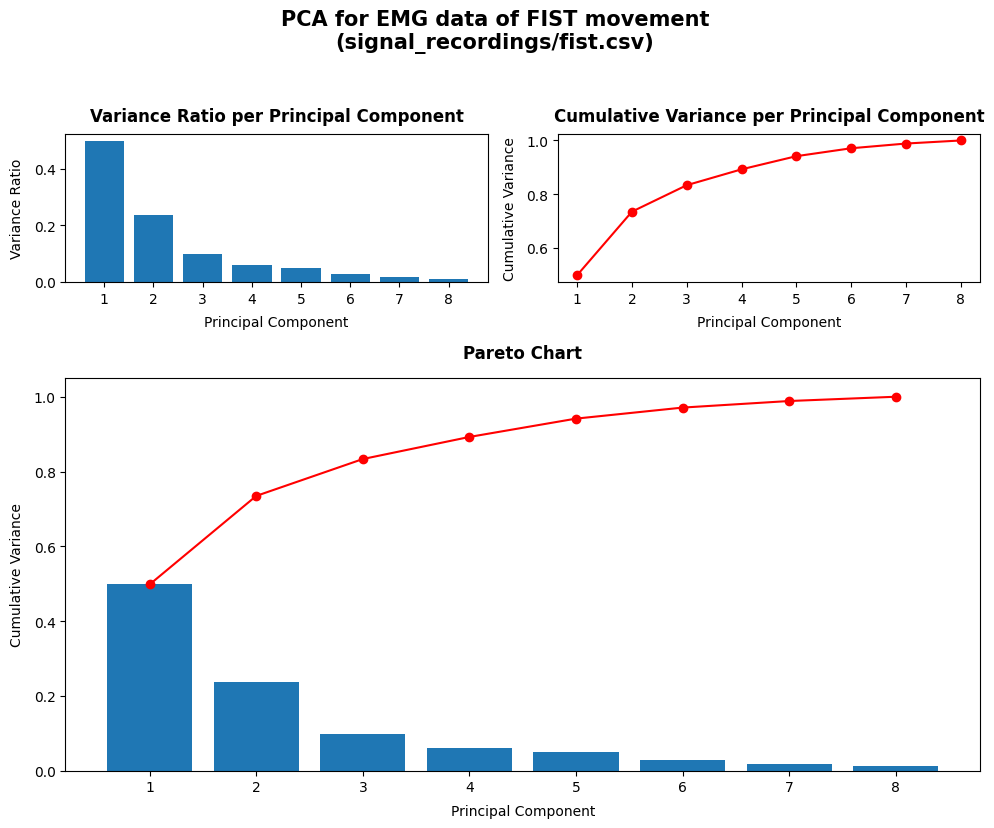

90% of the energy is retained by the first 5 PC
95% of the energy is retained by the first 6 PC

running PCA for signal_recordings/fist.csv with dimension reduction to 5 components...

variance ratio:
 [0.49788173 0.23680744 0.09865281 0.05910701 0.0490246 ]

cumulative variance:
 [0.49788173 0.73468917 0.83334197 0.89244899 0.94147359]


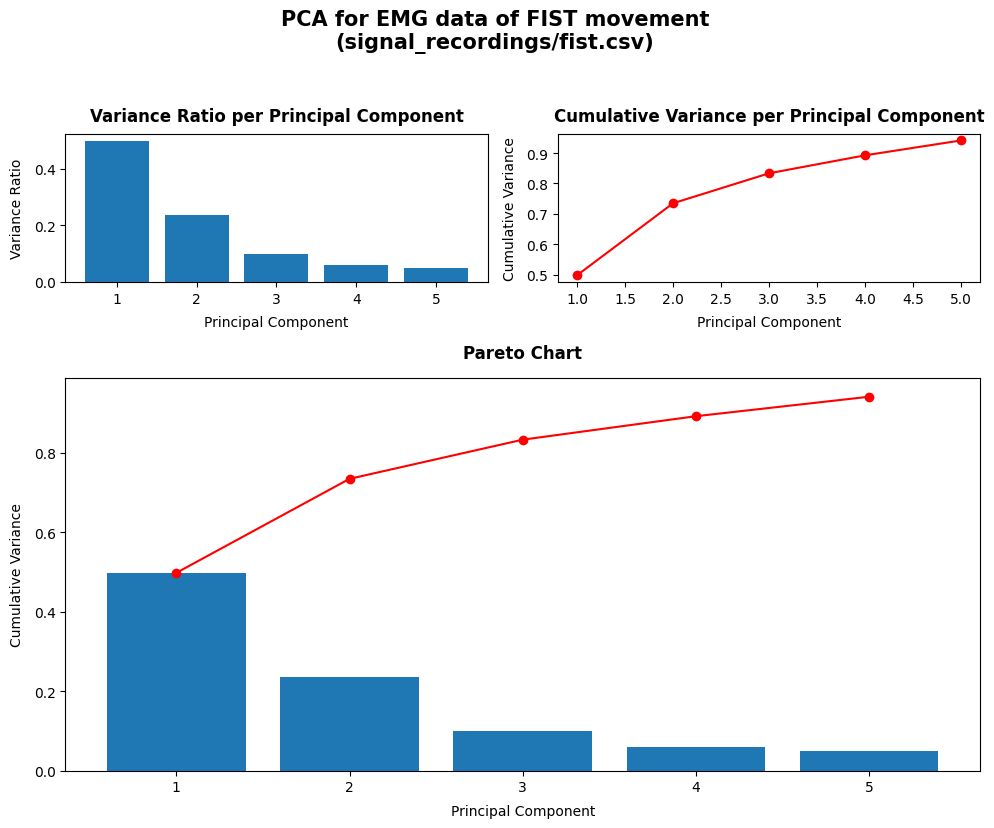

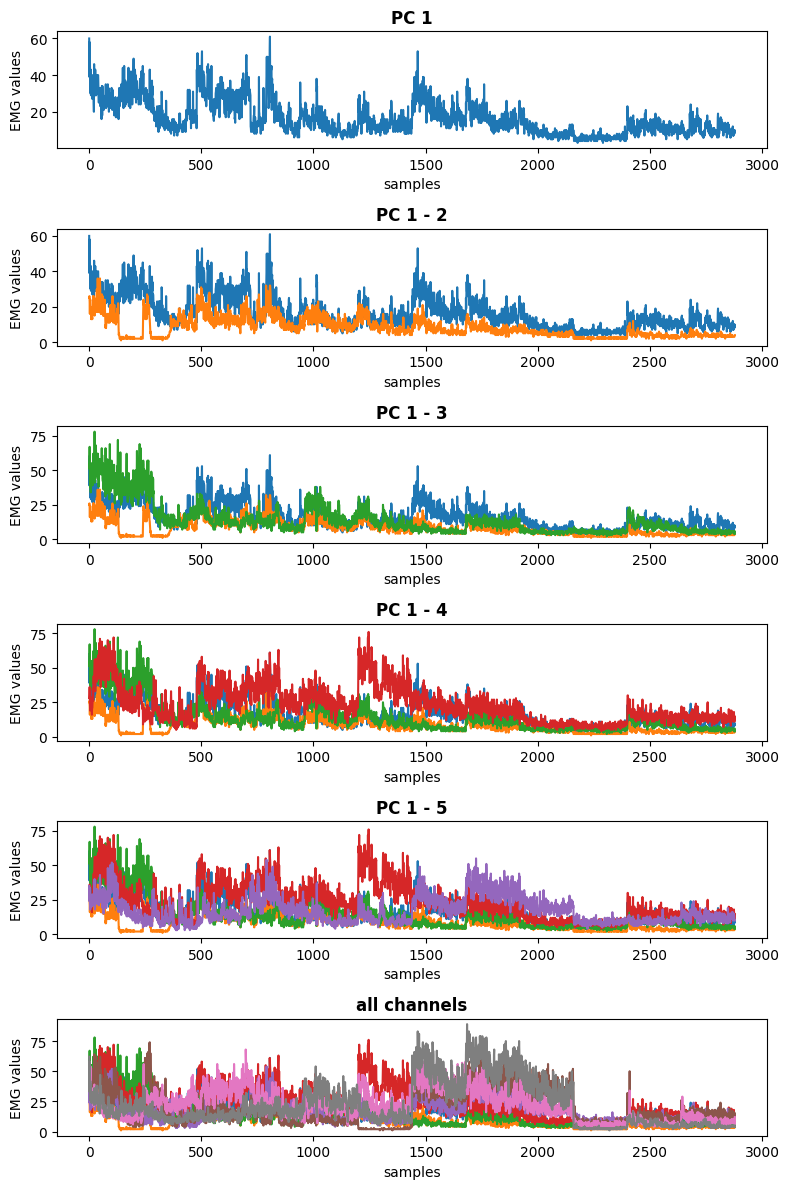

running PCA on ARV data for signal_recordings/flexion.csv...

original data:
 [[15 12 16 ... 28 22 44]
 [23 12 28 ... 36 21 34]
 [16 11 20 ... 22 22 40]
 ...
 [15  3  1 ...  5  3  6]
 [23  2  1 ...  8  3  9]
 [23  3  1 ...  7  3  6]]

variance ratio:
 [0.33660654 0.305942   0.13684972 0.10060409 0.05731163 0.032382
 0.01875769 0.01154633]

cumulative variance:
 [0.33660654 0.64254855 0.77939826 0.88000235 0.93731398 0.96969598
 0.98845367 1.        ]


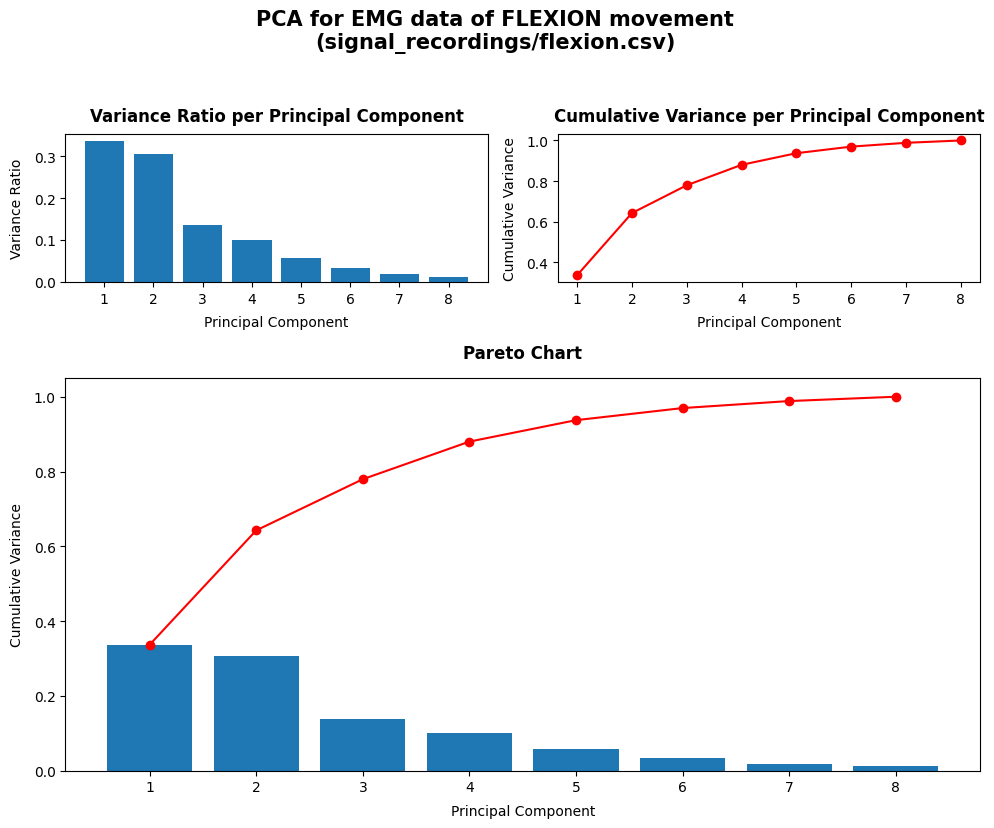

90% of the energy is retained by the first 5 PC
95% of the energy is retained by the first 6 PC

running PCA for signal_recordings/flexion.csv with dimension reduction to 5 components...

variance ratio:
 [0.33660654 0.305942   0.13684972 0.10060409 0.05731163]

cumulative variance:
 [0.33660654 0.64254855 0.77939826 0.88000235 0.93731398]


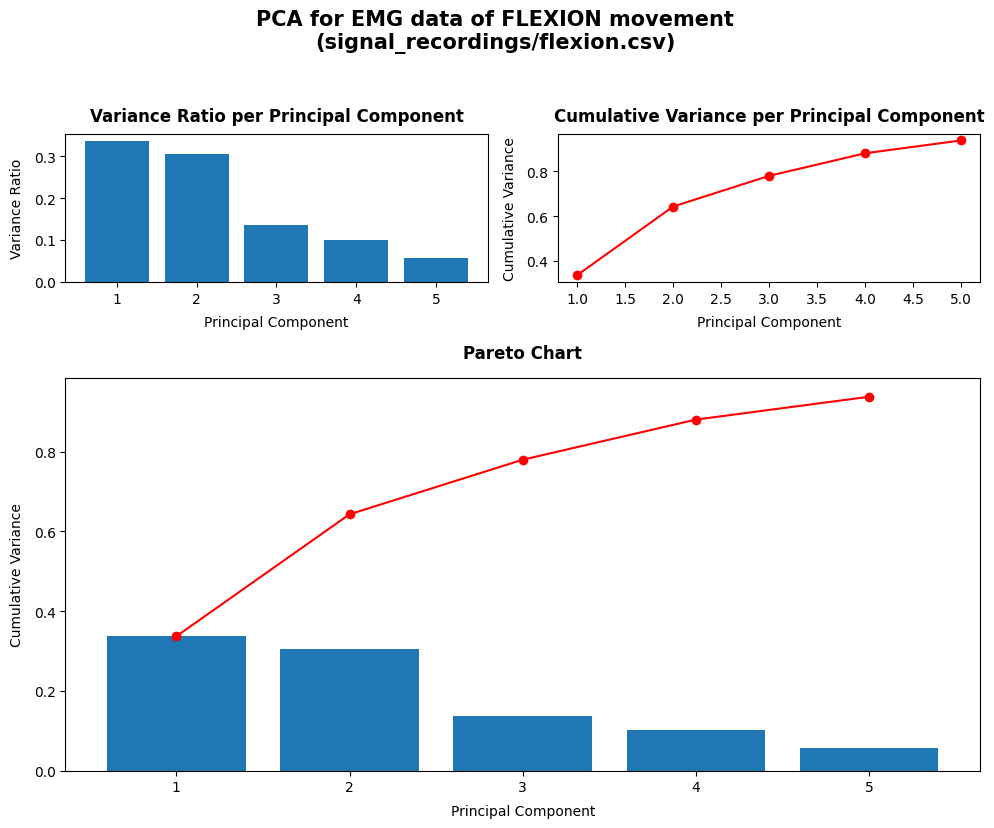

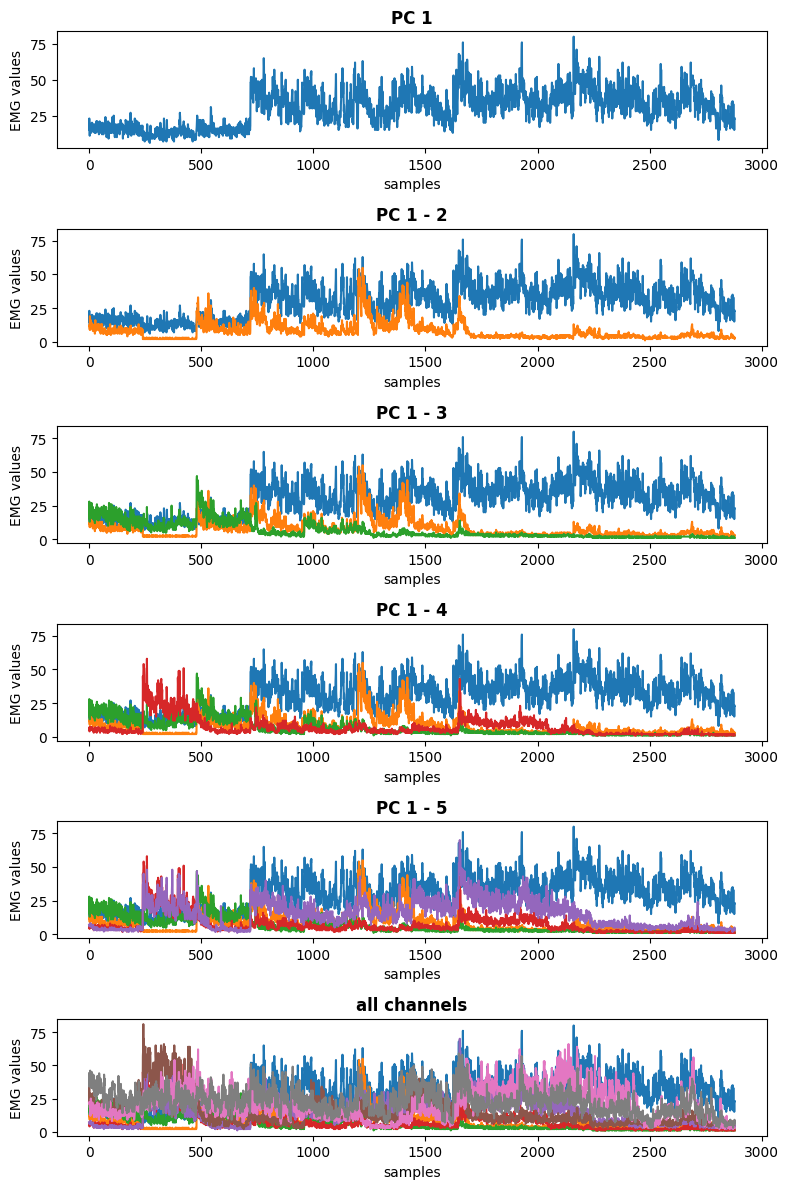

running PCA on ARV data for signal_recordings/neutral.csv...

original data:
 [[ 1  1 14 ...  1  1  1]
 [ 1  3 17 ...  1  1  1]
 [ 1  2 15 ...  1  1  1]
 ...
 [ 1  1  2 ...  1  1  1]
 [ 1  1  2 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]

variance ratio:
 [0.47408492 0.36300507 0.11147879 0.03376879 0.00994171 0.00426706
 0.00278399 0.00066966]

cumulative variance:
 [0.47408492 0.83708999 0.94856879 0.98233758 0.99227928 0.99654635
 0.99933034 1.        ]


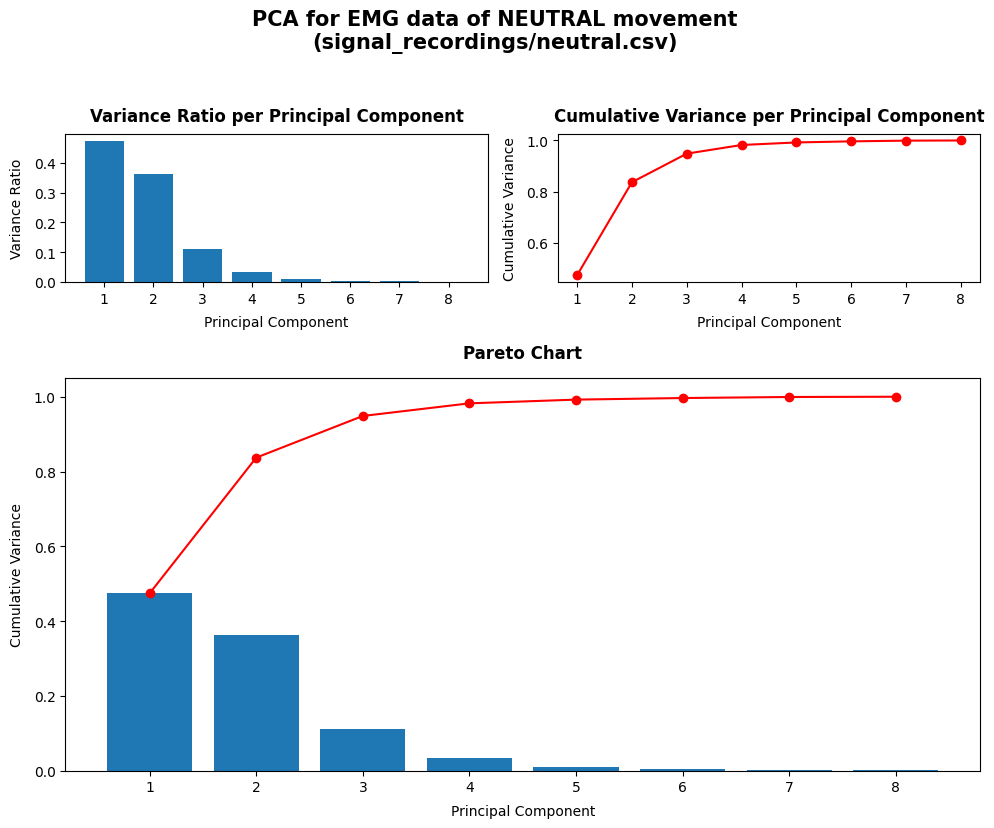

90% of the energy is retained by the first 3 PC
95% of the energy is retained by the first 4 PC

running PCA for signal_recordings/neutral.csv with dimension reduction to 3 components...

variance ratio:
 [0.47408492 0.36300507 0.11147879]

cumulative variance:
 [0.47408492 0.83708999 0.94856879]


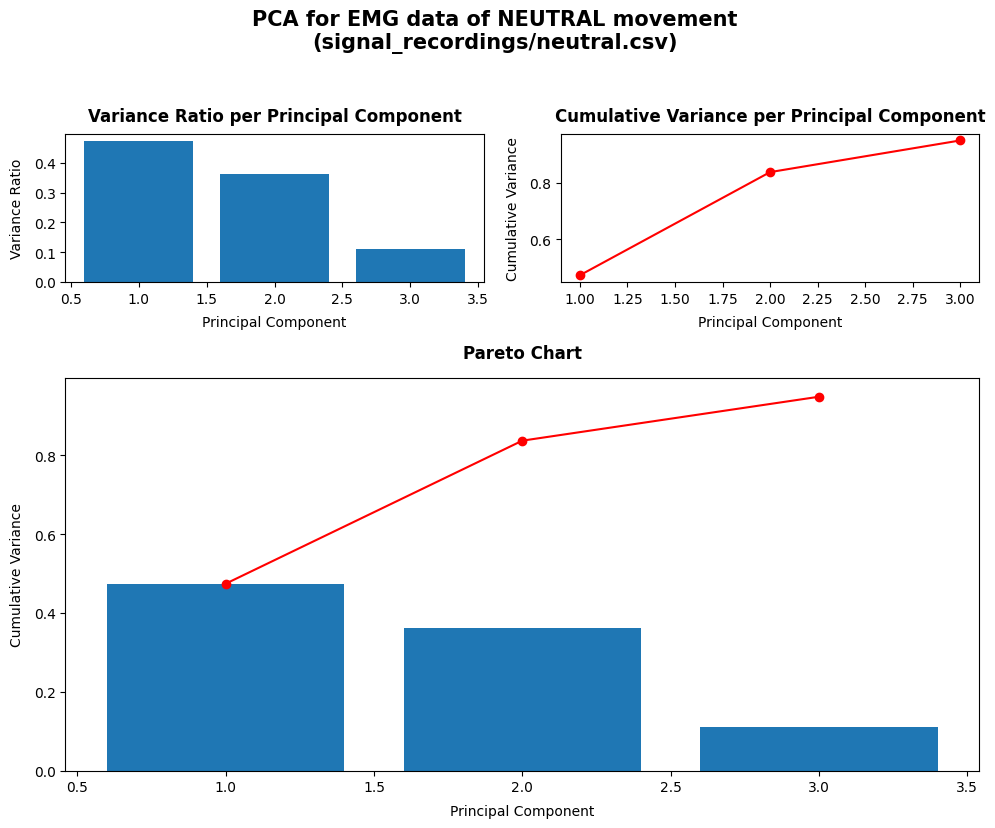

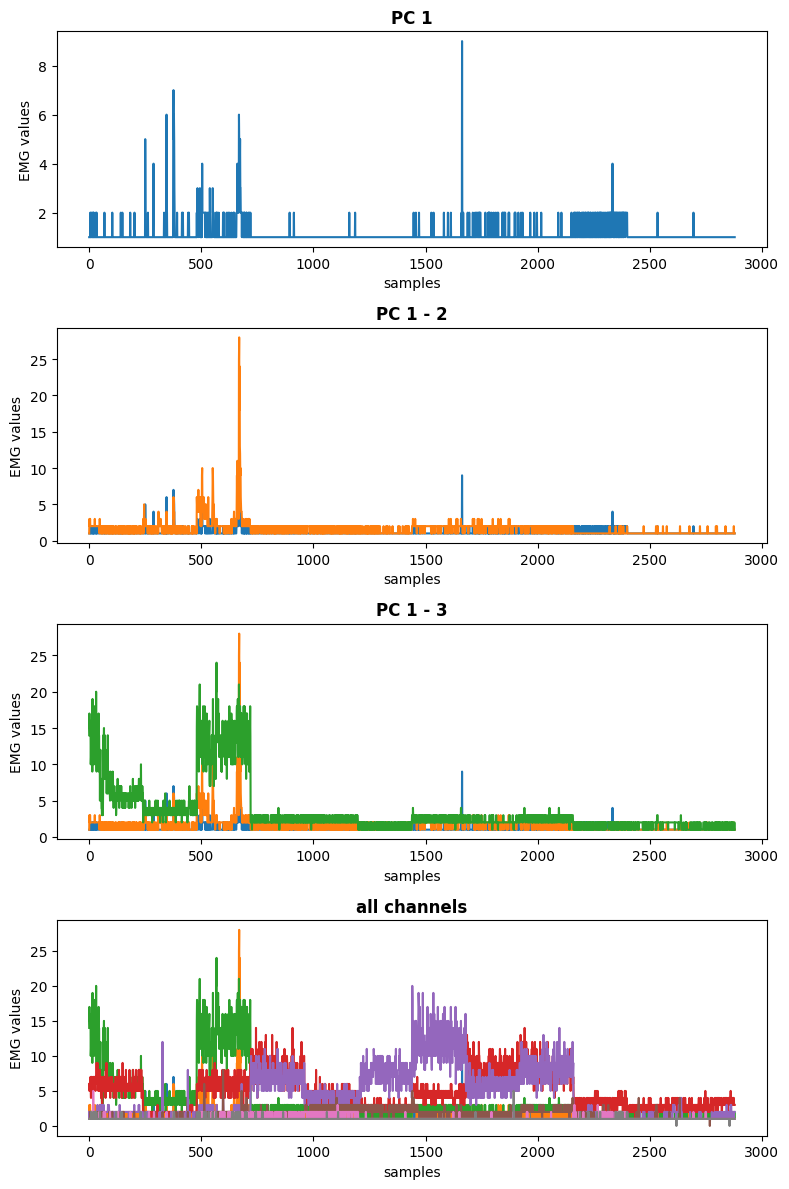

running PCA on ARV data for signal_recordings/pronation.csv...

original data:
 [[26 44 36 ... 54 48 22]
 [25 42 43 ... 41 39 23]
 [23 43 32 ... 34 45 15]
 ...
 [ 9  3  2 ...  9  4  2]
 [ 9  4  2 ... 11  5  2]
 [ 6  3  2 ...  7  5  2]]

variance ratio:
 [0.55844647 0.15074671 0.11064217 0.06834866 0.04362735 0.02981591
 0.02633795 0.01203478]

cumulative variance:
 [0.55844647 0.70919318 0.81983535 0.88818401 0.93181135 0.96162727
 0.98796522 1.        ]


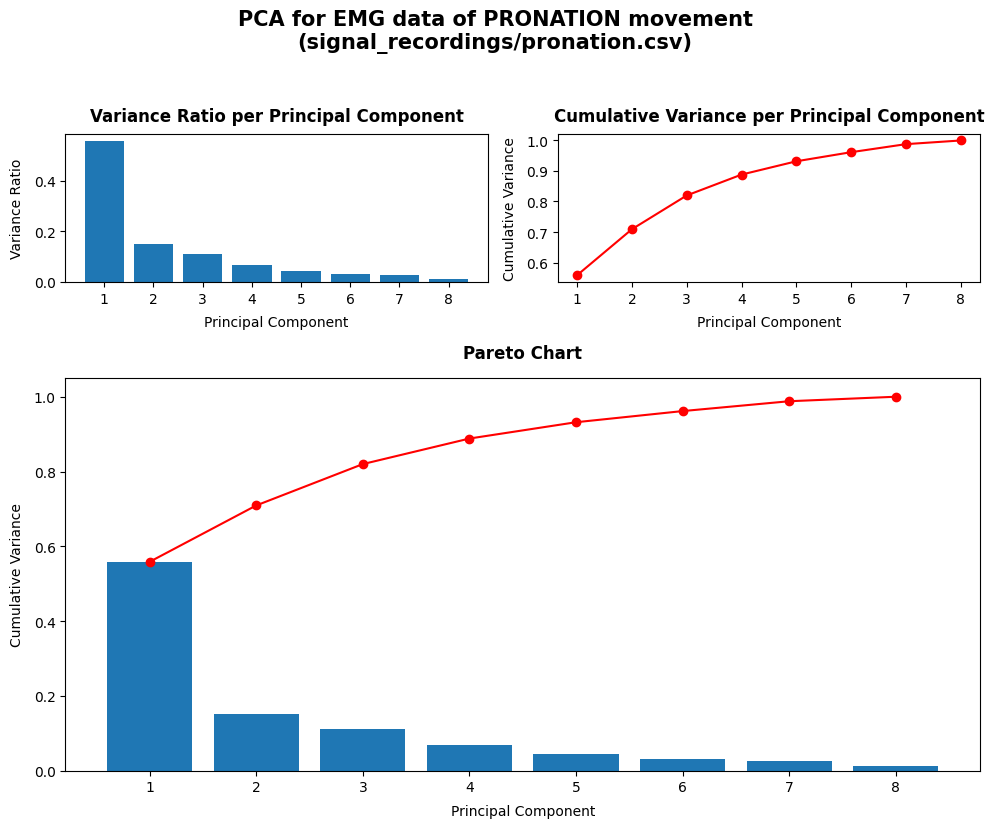

90% of the energy is retained by the first 5 PC
95% of the energy is retained by the first 6 PC

running PCA for signal_recordings/pronation.csv with dimension reduction to 5 components...

variance ratio:
 [0.55844647 0.15074671 0.11064217 0.06834866 0.04362735]

cumulative variance:
 [0.55844647 0.70919318 0.81983535 0.88818401 0.93181135]


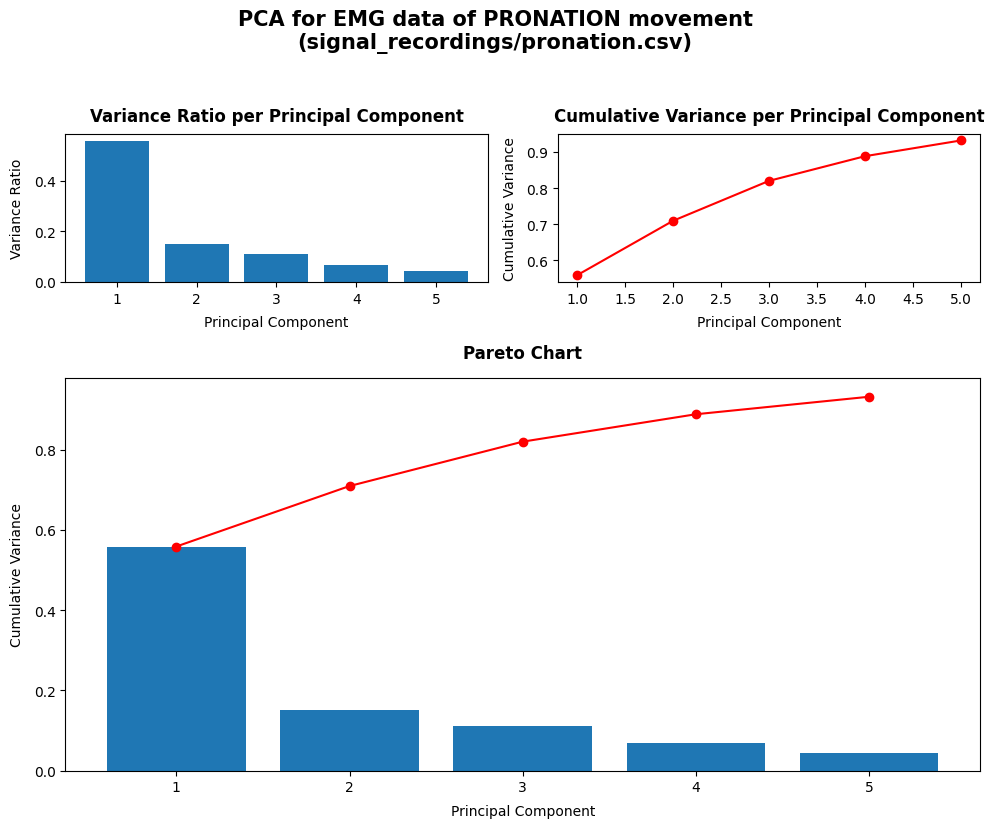

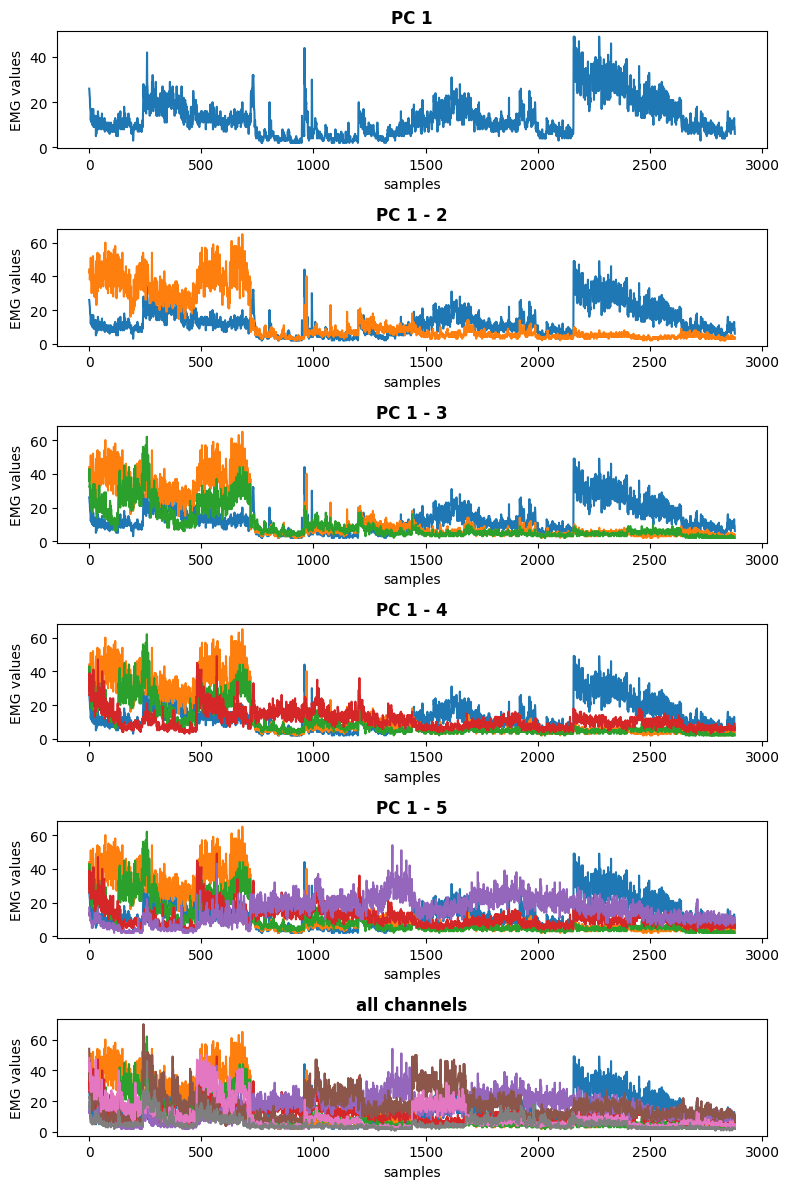

running PCA on ARV data for signal_recordings/radial_deviation.csv...

original data:
 [[ 7  9 31 ... 20 38  7]
 [ 7  8 40 ... 30 30  5]
 [ 7  7 33 ... 23 30  6]
 ...
 [16  3  4 ...  2  2  1]
 [19  2  4 ...  3  2  2]
 [25  2  4 ...  4  2  2]]

variance ratio:
 [0.53375877 0.14660596 0.11453737 0.08820218 0.05535053 0.02960488
 0.02241975 0.00952055]

cumulative variance:
 [0.53375877 0.68036474 0.79490211 0.88310429 0.93845482 0.9680597
 0.99047945 1.        ]


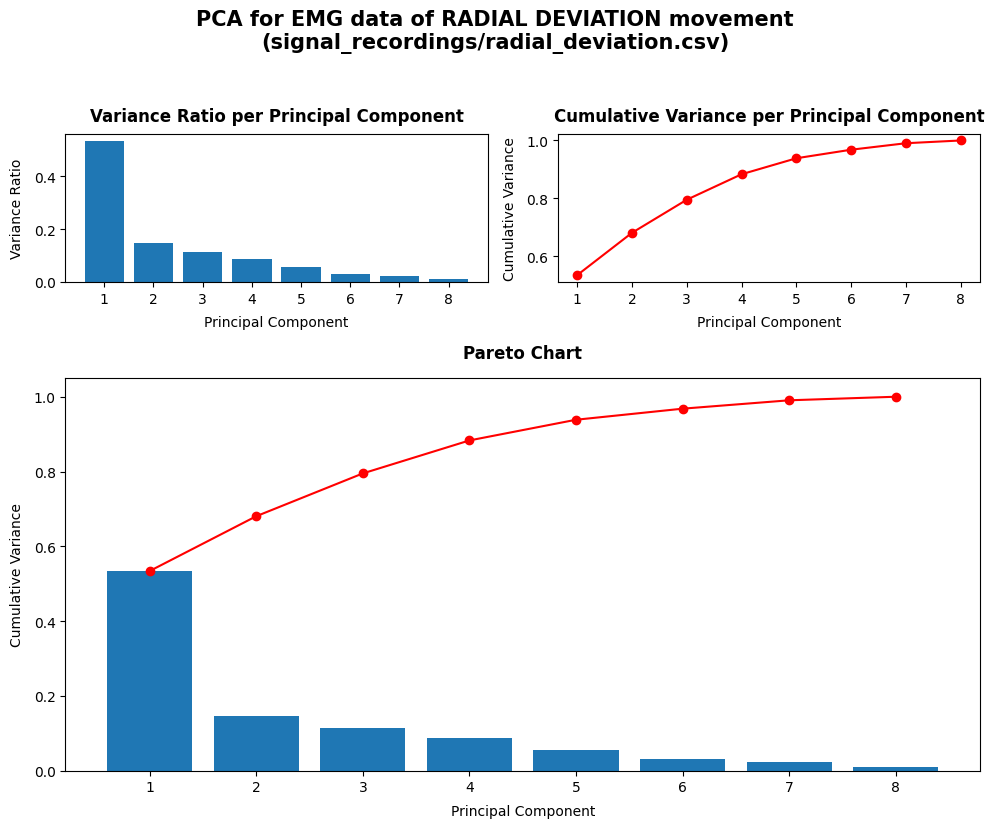

90% of the energy is retained by the first 5 PC
95% of the energy is retained by the first 6 PC

running PCA for signal_recordings/radial_deviation.csv with dimension reduction to 5 components...

variance ratio:
 [0.53375877 0.14660596 0.11453737 0.08820218 0.05535053]

cumulative variance:
 [0.53375877 0.68036474 0.79490211 0.88310429 0.93845482]


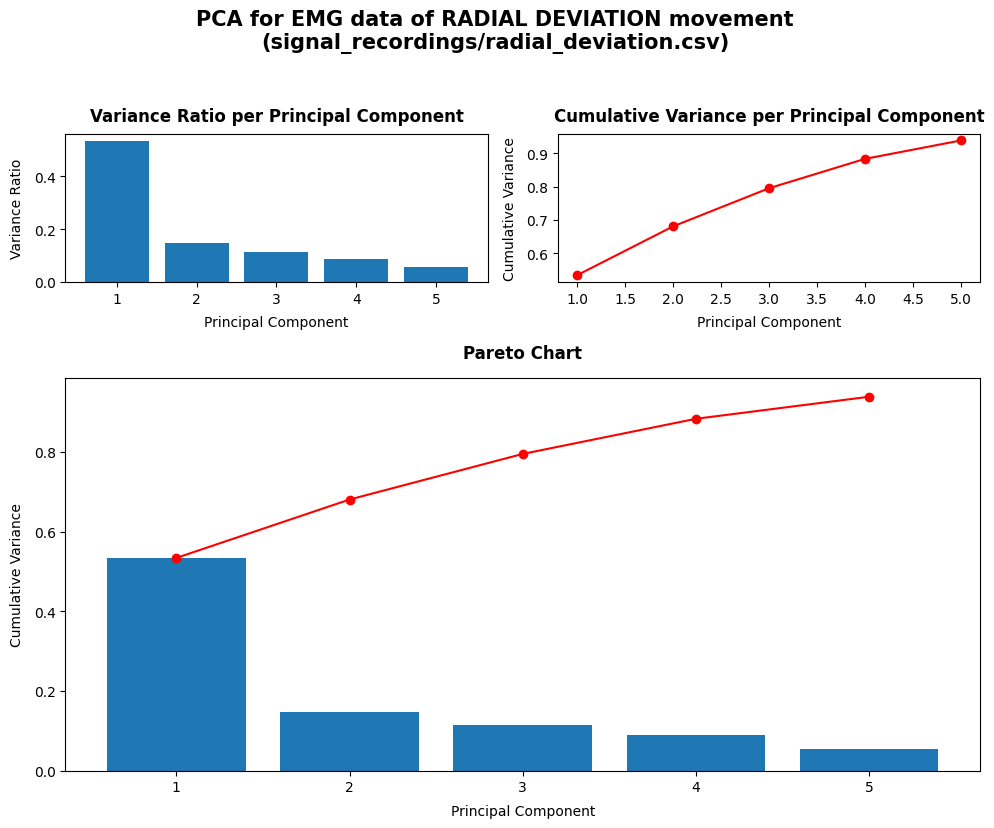

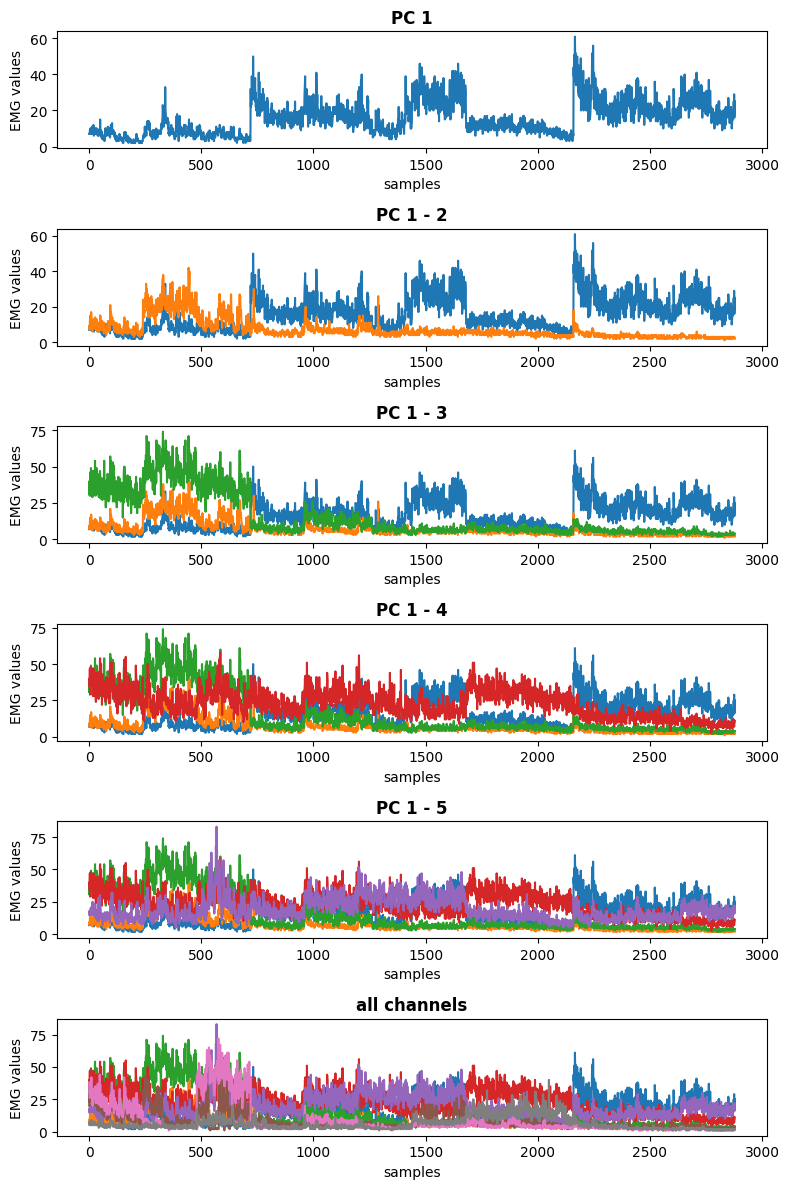

running PCA on ARV data for signal_recordings/supination.csv...

original data:
 [[ 8 14 19 ...  5  6 16]
 [11 29 26 ...  8  6 12]
 [12 26 29 ...  9  6 10]
 ...
 [ 1  2  2 ...  5  4  1]
 [ 1  2  2 ...  3  5  1]
 [ 1  1  2 ...  4  5  1]]

variance ratio:
 [0.59945852 0.1540324  0.09667483 0.04885045 0.03316284 0.03121341
 0.0240303  0.01257725]

cumulative variance:
 [0.59945852 0.75349092 0.85016575 0.8990162  0.93217904 0.96339244
 0.98742275 1.        ]


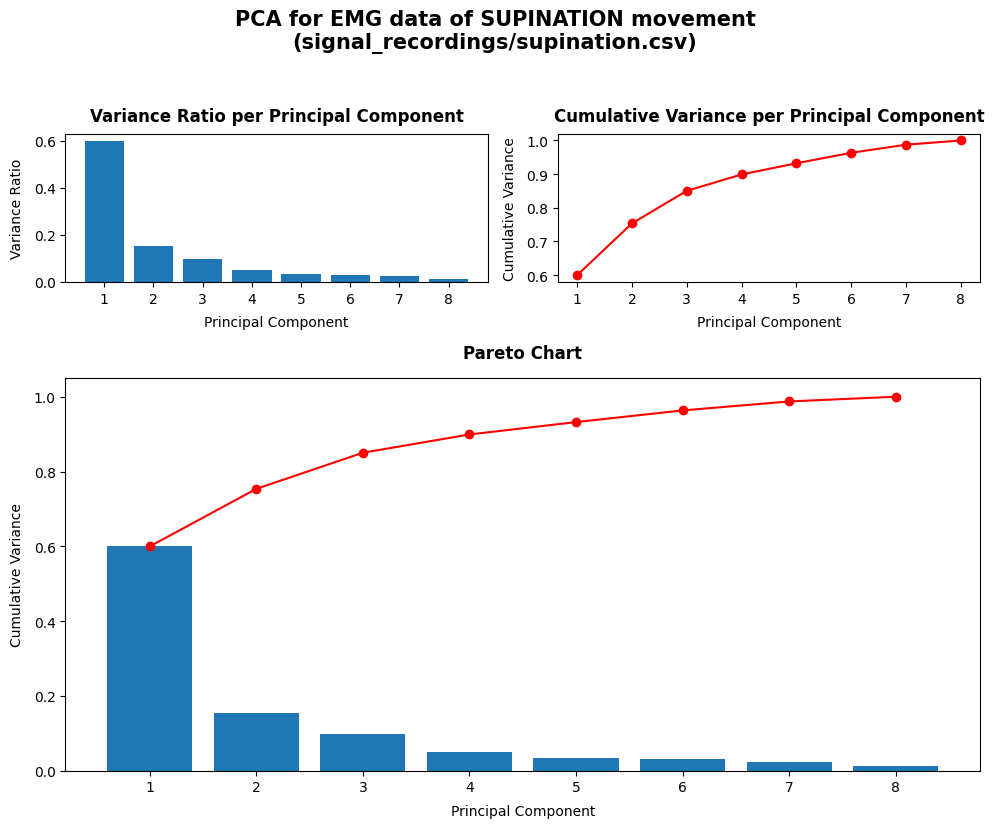

90% of the energy is retained by the first 5 PC
95% of the energy is retained by the first 6 PC

running PCA for signal_recordings/supination.csv with dimension reduction to 5 components...

variance ratio:
 [0.59945852 0.1540324  0.09667483 0.04885045 0.03316284]

cumulative variance:
 [0.59945852 0.75349092 0.85016575 0.8990162  0.93217904]


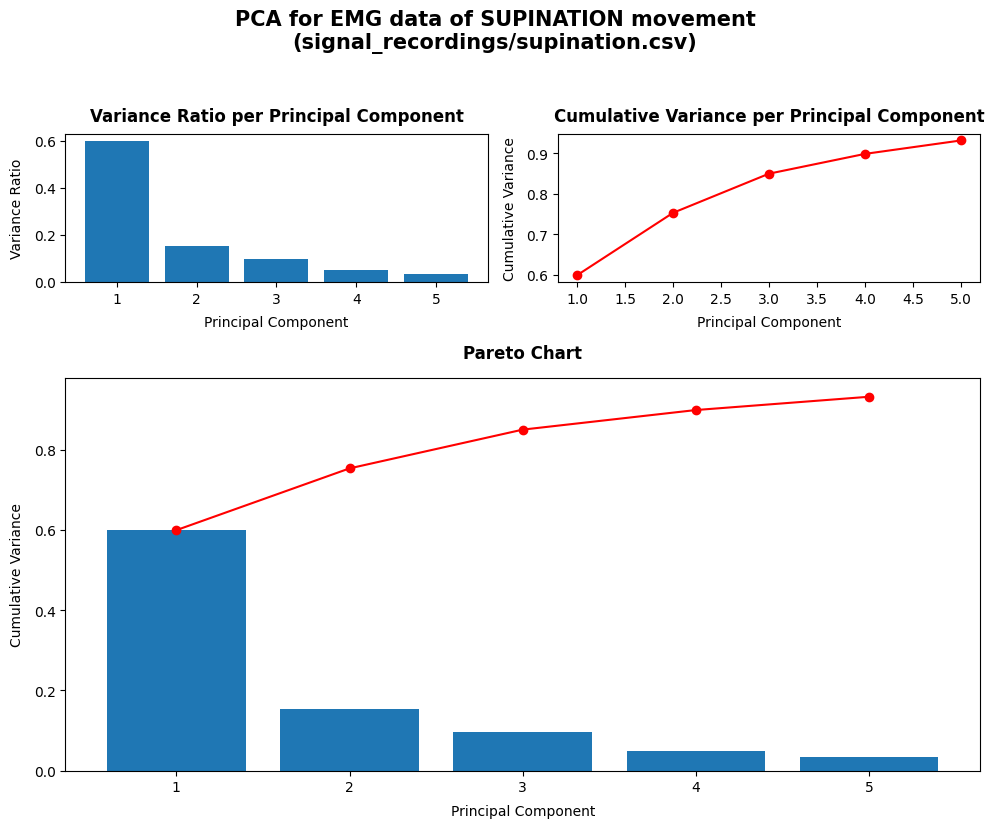

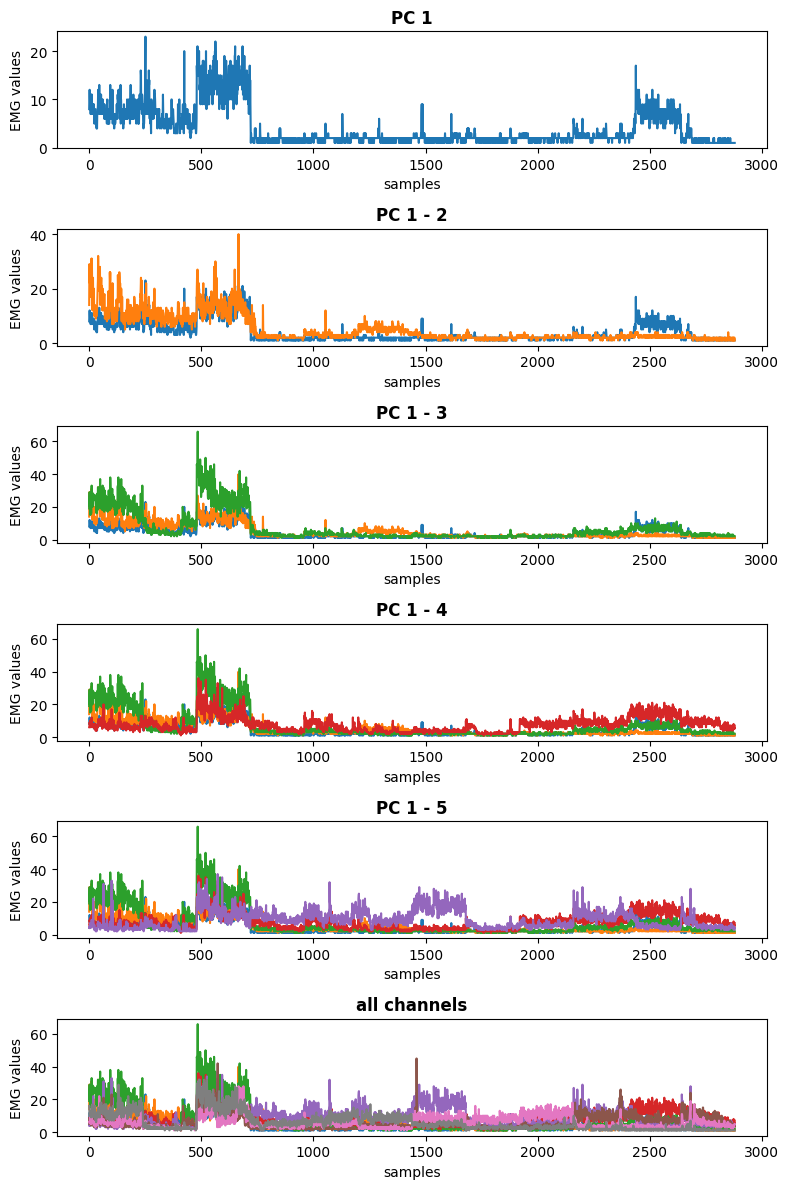

running PCA on ARV data for signal_recordings/ulnar deviation.csv...

original data:
 [[22 65 46 ... 10  9 22]
 [23 48 42 ... 15  8 17]
 [26 49 51 ... 11  9 25]
 ...
 [ 2  2  2 ... 16  6 19]
 [ 2  2  2 ... 26  6 17]
 [ 2  1  1 ... 23  4 13]]

variance ratio:
 [0.5421845  0.18045037 0.1193452  0.07351978 0.03238147 0.02363259
 0.01536887 0.01311723]

cumulative variance:
 [0.5421845  0.72263487 0.84198007 0.91549985 0.94788131 0.97151391
 0.98688277 1.        ]


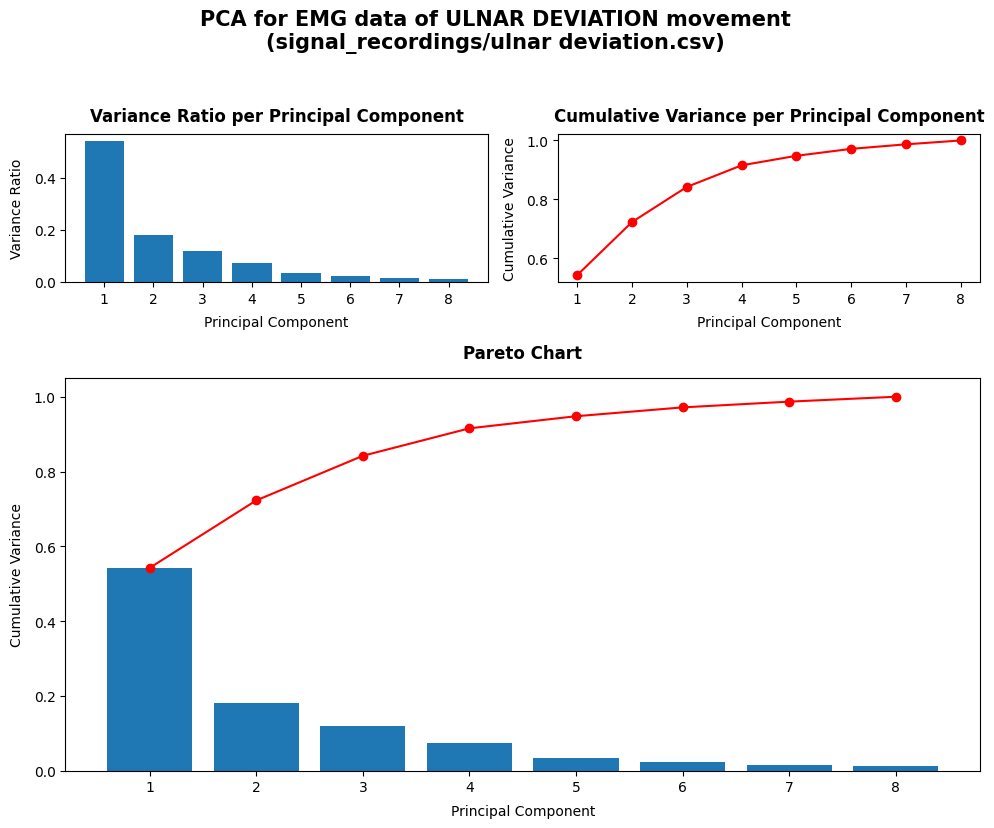

90% of the energy is retained by the first 4 PC
95% of the energy is retained by the first 6 PC

running PCA for signal_recordings/ulnar deviation.csv with dimension reduction to 4 components...

variance ratio:
 [0.5421845  0.18045037 0.1193452  0.07351978]

cumulative variance:
 [0.5421845  0.72263487 0.84198007 0.91549985]


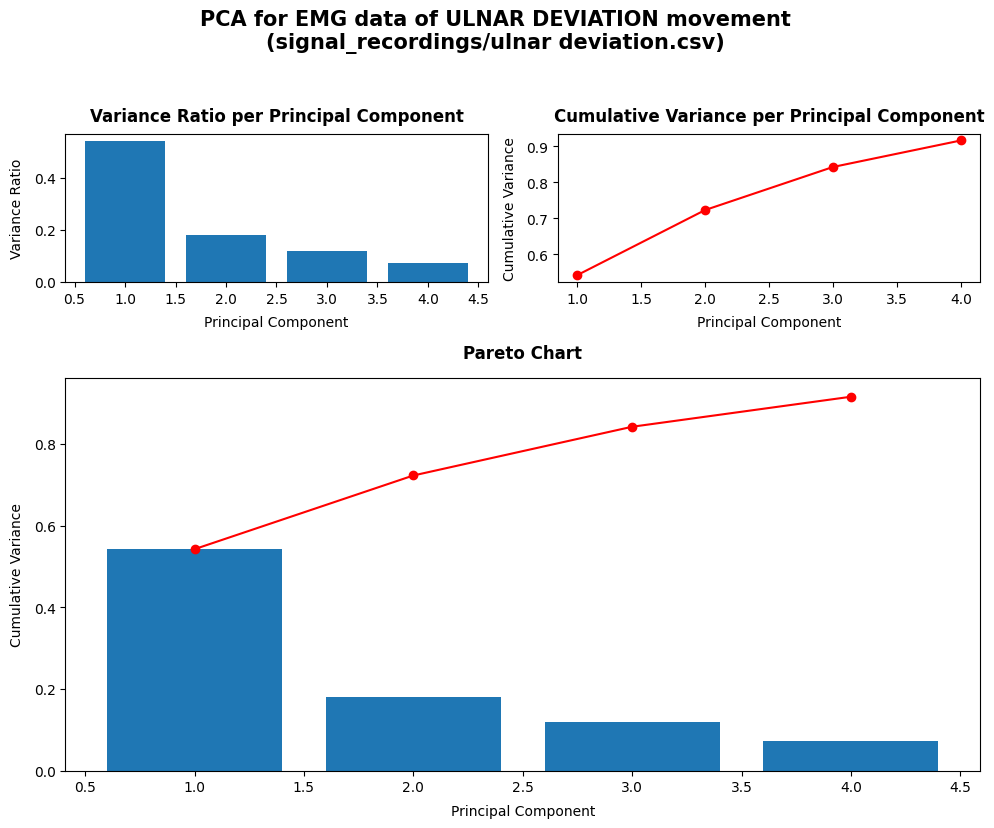

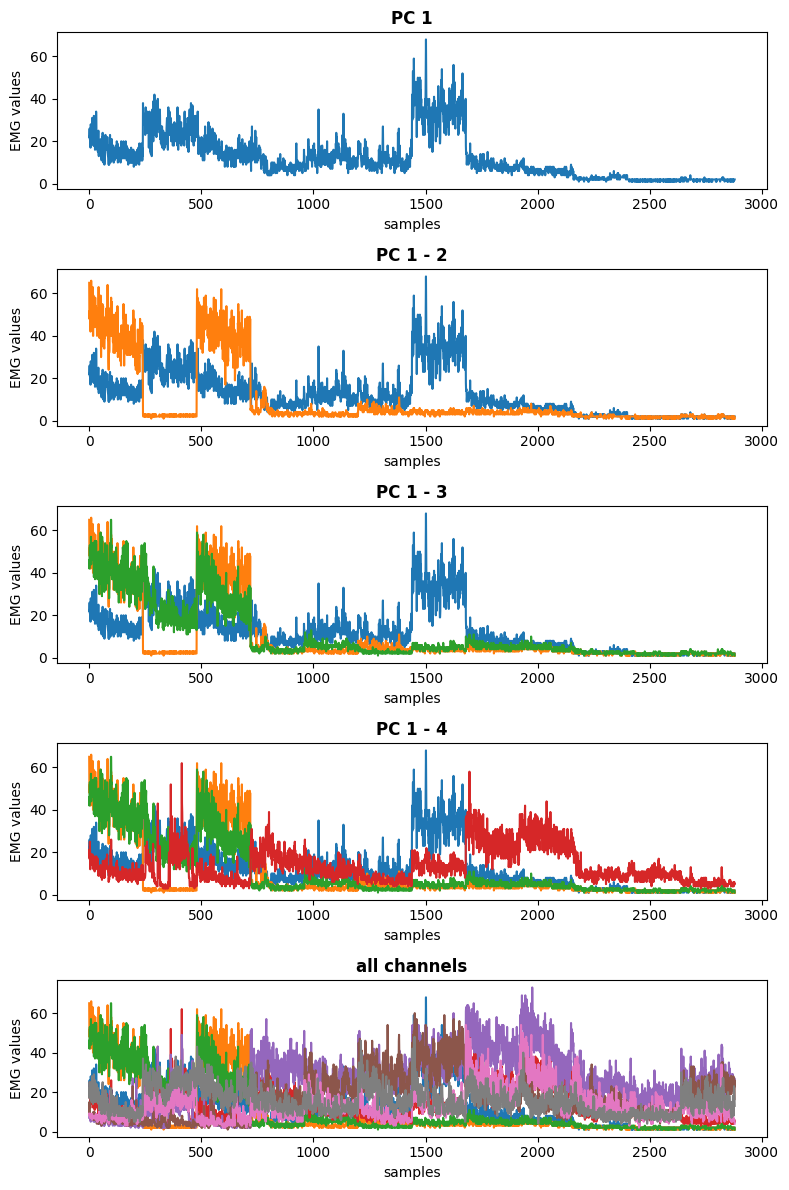

running PCA on ARV data for signal_recordings/extension.csv...

original data:
 [[13 35 52 ...  5  3  5]
 [15 50 51 ...  6  4  6]
 [ 7 26 49 ...  7  4  5]
 ...
 [ 9  8  8 ... 10  4  3]
 [ 6  5  7 ...  9  4  3]
 [ 7  5  7 ...  8  4  3]]

variance ratio:
 [0.56244864 0.26909266 0.07900972 0.03905638 0.02353862 0.01778072
 0.0073681  0.00170516]

cumulative variance:
 [0.56244864 0.8315413  0.91055101 0.9496074  0.97314602 0.99092674
 0.99829484 1.        ]


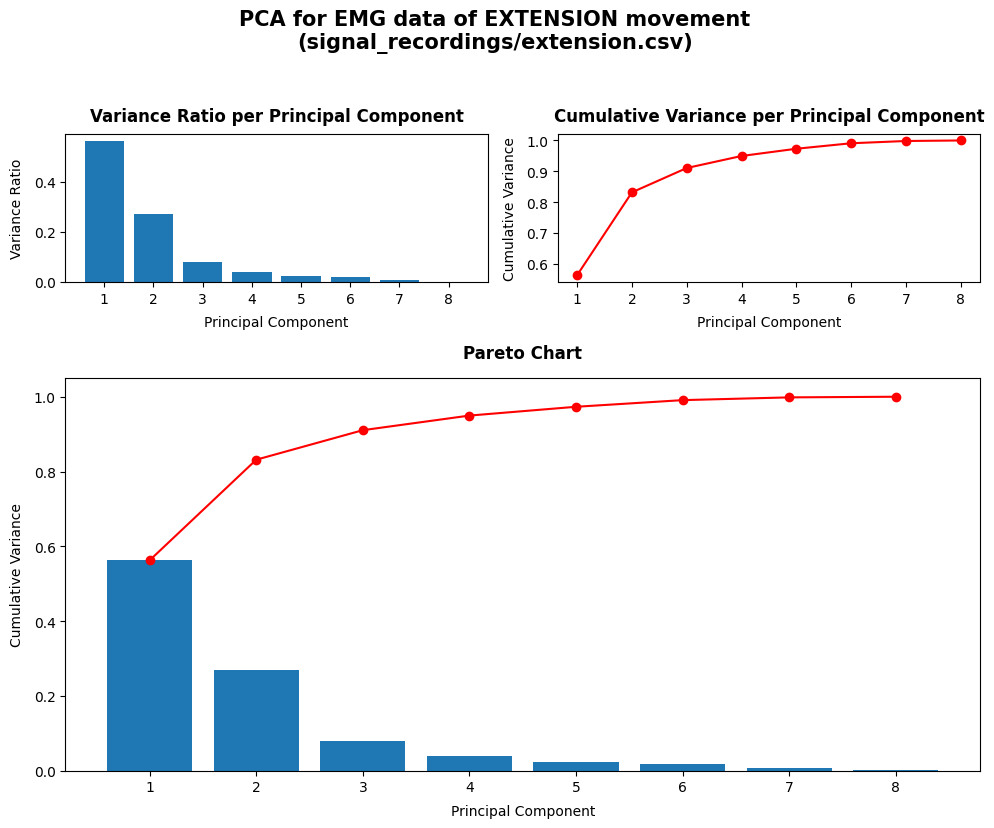

90% of the energy is retained by the first 3 PC
95% of the energy is retained by the first 5 PC

running PCA for signal_recordings/extension.csv with dimension reduction to 3 components...

variance ratio:
 [0.56244864 0.26909266 0.07900972]

cumulative variance:
 [0.56244864 0.8315413  0.91055101]


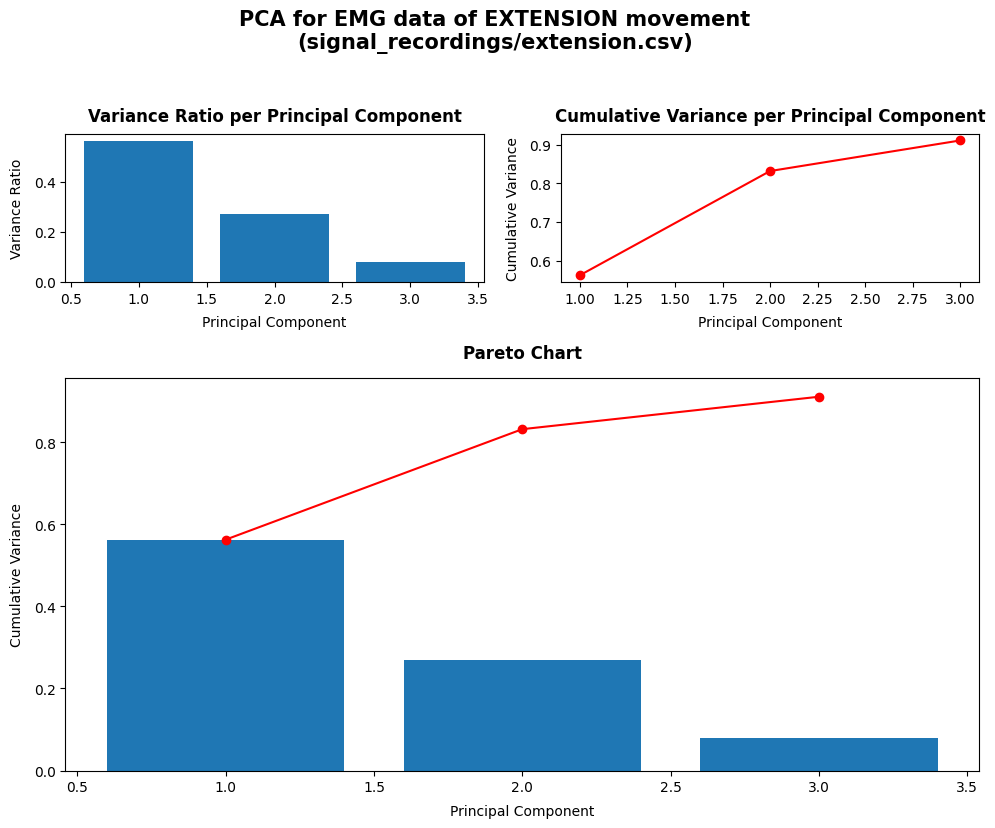

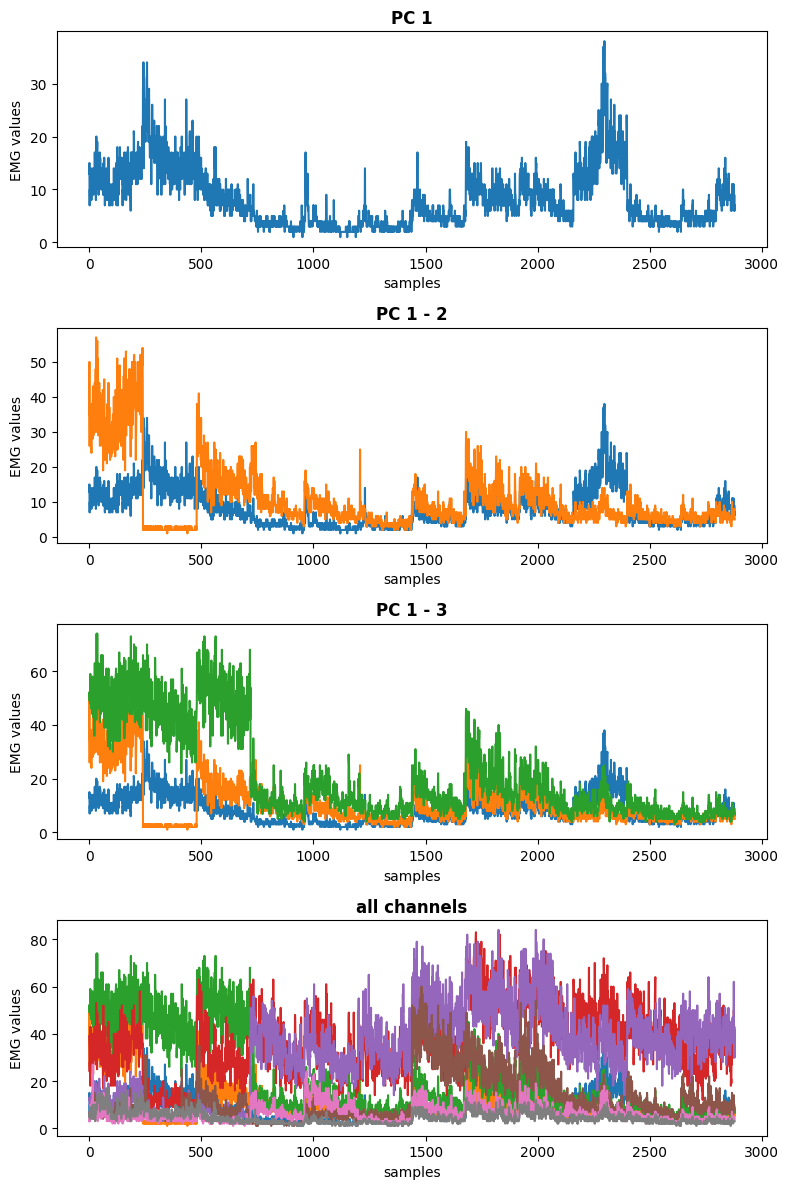

In [11]:
# read EMG data
initial_dimensions = 8

selection = str(input("EMG or ARV?"))

path = "signal_recordings"
for file_name in os.listdir(path):
    if file_name.endswith('.csv'):
        # read data from .csv file
        data: List[List[float]] = pd.read_csv(f"{path}/{file_name}").values

        # calculate ARV
        if selection == "ARV":
            print(f"running PCA on ARV data for {path}/{file_name}...\n")
            data: List[List[float]] = calculate_arv(data, window_size=25, channels=8)
        else:
            print(f"running PCA for {path}/{file_name}...\n")

        # PCA
        variance_ratio, cumulative_variance, movement = run_pca(data, initial_dimensions, file_name, reduced=False)
        plot_variance(variance_ratio, cumulative_variance, movement, file_name, path)

        # reduce dimensions for sufficient movement recognition
        retained_components: int = reduce_dimensions(cumulative_variance, threshold=0.9)

        # assignment questions
        retained_95: int = reduce_dimensions(cumulative_variance, threshold=0.95)
        print(f"90% of the energy is retained by the first {retained_components} PC")
        print(f"95% of the energy is retained by the first {retained_95} PC\n")
        
        # PCA with reduced dimensions
        print(f"running PCA for {path}/{file_name} with dimension reduction to {retained_components} components...\n")

        variance_ratio, cumulative_variance, movement = run_pca(data, retained_components, file_name, reduced=True)
        plot_variance(variance_ratio, cumulative_variance, movement, file_name, path)
        plot_retained_channels(data, retained_components)